# T1 - Interesse em aulas particulares de Cálculo

## 0.1 - Importando bibliotecas


In [536]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 0.2 - Definindo listas de separação de colunas

In [537]:
colunas_variaveis_qualitativas = [
    "sexo",
    "estado_civil",
    "regiao",
    "profissao",
    "grau_de_dificuldade",
    "curso",
    "serie",
    "dp",
    "fator_de_decisao_na_compra",
    "relevancia_nivel_de_profissionalizacao",
    "relevancia_qualidade_dos_textos",
    "relevancia_qualidade_dos_exercicios",
    "relevancia_preco_hora",
    "relevancia_aprovacao",
    "relevancia_localizacao",
    "gostou_do_produto",
    "divulgaria_produto",
    "compraria_produto",
    "vale_a_pena_50",
    "compraria_produto_final",
    "dificuldade_compreensao",
    "dificuldade_resolver_problemas",
    "dificuldade_equacoes_graficos",
    "dificuldade_aplicar_conceitos",
    "dificuldade_notacoes",
    "interesse_politica",
    "interesse_lazer",
    "interesse_esportes",
    "interesse_economia",
    "interesse_automoveis",
    "interesse_tecnologia",
    "interesse_outros"
]

colunas_variaveis_discretas = [
    "idade",
    "tempo_ideal"
]

colunas_variaveis_continuas = [
    "renda",
    "valor_justo"
]

## 0.3 - Definindo funções

In [538]:
def plotaHist(data,x,titulo,xlabel,ylabel, **kwargs):
    ax = sns.histplot(data=data,x=x,shrink=0.9,multiple='stack', **kwargs)
    ax.set_title(titulo, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.tick_params(labelsize=15)
    ax.grid(False)
    return ax

def plotaBox(data,x,titulo,xlabel,ylabel, **kwargs):
    ax = sns.boxplot(data=data,x=x, **kwargs)
    ax.set_title(titulo, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.tick_params(labelsize=15)
    ax.grid(False)
    return ax

def tableOfFrequency(series,tradutor=False):
    dados = pd.DataFrame(series.value_counts())
    dados.sort_index(inplace=True)

    if tradutor:
        dados[''] = dados.index.to_series().map(tradutor)
        dados.set_index('',inplace=True)
        
    
    total = dados['count'].sum()
    dados.loc['total'] = total
    dados['%'] = round((dados['count']/total)*100,2)
    
    return dados

## 1 - Importando o arquivo

In [539]:
LOCAL = "data.csv"
df = pd.read_csv(LOCAL)

pd.set_option('display.max_columns', None)

In [540]:
# Tirando colunas não relevantes

colunas_nao_relevantes = [
    "Carimbo de data/hora",

]

df.drop(columns=colunas_nao_relevantes, inplace=True)
  


In [541]:
colunas_antigas = list(df.columns)
colunas_antigas

['Qual a sua idade?',
 'Qual seu sexo?',
 'Qual o seu estado civil?',
 'Onde você mora?',
 'Qual a sua profissão?',
 'Qual a sua renda pessoal mensal aproximada em reais?',
 'Quais são as principais dificuldades que você enfrenta ao estudar cálculo?',
 'De uma escala de 1 à 5, qual o nível sua dificuldade em Cálculo:',
 'Qual o seu curso?',
 'Em qual ano do seu curso você está?',
 'Você tem DP de Cálculo?',
 'Qual assunto desperta a sua atenção?',
 'Das opções abaixo, qual você considera a mais importante ao comprar uma aula particular?',
 'Nível de profissionalização do professor',
 'Qualidade dos textos base (livros usados)',
 'Qualidade dos exercícios',
 'Preço hora/aula',
 'Localização (Online ou Presencial)',
 'Estatística de pessoas que já passaram de ano por conta dessas aulas',
 'Você gostou do nosso produto?',
 'Você divulgaria o nosso produto aos seus amigos e/ou familiares?',
 'Você compraria o nosso produto?',
 'Quanto tempo você considera ideal para uma aula particular? (e

In [542]:
# Trocando nome das colunas
troca_de_colunas = {
 'Qual a sua idade?': "idade",
 'Qual seu sexo?': "sexo",
 'Qual o seu estado civil?': "estado_civil",
 'Onde você mora?': "regiao",
 'Qual a sua profissão?': "profissao",
 'Qual a sua renda pessoal mensal aproximada em reais?': "renda",
 'Quais são as principais dificuldades que você enfrenta ao estudar cálculo?': "dificuldades_em_estudar_calculo",
 'De uma escala de 1 à 5, qual o nível sua dificuldade em Cálculo:': "grau_de_dificuldade",
 'Qual o seu curso?': "curso",
 'Em qual ano do seu curso você está?': "serie",
 'Você tem DP de Cálculo?': "dp",
 'Qual assunto desperta a sua atenção?': "assunto_de_interesse",
 'Das opções abaixo, qual você considera a mais importante ao comprar uma aula particular?': "fator_de_decisao_na_compra",
 'Nível de profissionalização do professor': "relevancia_nivel_de_profissionalizacao",
 'Qualidade dos textos base (livros usados)': "relevancia_qualidade_dos_textos",
 'Qualidade dos exercícios': "relevancia_qualidade_dos_exercicios",
 'Preço hora/aula': "relevancia_preco_hora",
 'Localização (Online ou Presencial)': "relevancia_localizacao",
 'Estatística de pessoas que já passaram de ano por conta dessas aulas': "relevancia_aprovacao",
 'Você gostou do nosso produto?': "gostou_do_produto",
 'Você divulgaria o nosso produto aos seus amigos e/ou familiares?': "divulgaria_produto",
 'Você compraria o nosso produto?': "compraria_produto",
 'Quanto tempo você considera ideal para uma aula particular? (em horas)': "tempo_ideal",
 'Se o valor do produto for de R$50,00/hora de aula, você diria que:': "vale_a_pena_50",
 'Quanto você considera que seria um valor justo a pagar pelo nosso produto (apenas o número)?': "valor_justo",
 'Pelos custos de produção e comercialização calculados, teremos que comercializar esse produto por R$60,00. Por esse valor, você o compraria?': "compraria_produto_final"
}

df.columns = list(troca_de_colunas.values())

Agora será feito o tratamento dos dados. Algumas colunas terão os valores substituidos, para facilitar a manipulação dos dados.

A seguir, estão os dicionários referente às trocas de valores feitas

In [543]:
trocando_sexo = {
    "Masculino":0,
    "Feminino":1
}

contrario_trocando_sexo = dict(zip(trocando_sexo.values(), trocando_sexo.keys()))

dificuldades_em_estudar_calculo_opcoes = {
    "Compreensão geral dos conceitos matemáticos": "dificuldade_compreensao",
    "Habilidade em resolver problemas matemáticos": "dificuldade_resolver_problemas",
    "Habilidade em trabalhar com equações e gráficos matemáticos": "dificuldade_equacoes_graficos",
    "Habilidade em aplicar conceitos matemáticos para situações práticas": "dificuldade_aplicar_conceitos",
    "Dificuldade em entender ou aplicar notações matemáticas": "dificuldade_notacoes"
}

contrario_dificuldades_em_estudar_calculo_opcoes = dict(zip(dificuldades_em_estudar_calculo_opcoes.values(), dificuldades_em_estudar_calculo_opcoes.keys()))

assunto_de_interesse_opcoes = {
    "Política": "interesse_politica",
    "Lazer": "interesse_lazer",
    "Esportes": "interesse_esportes",
    "Economia": "interesse_economia",
    "Automóveis": "interesse_automoveis",
    "Tecnologia": "interesse_tecnologia",
    "Outros": "interesse_outros",
}

contrario_assunto_de_interesse_opcoes = dict(zip(assunto_de_interesse_opcoes.values(), assunto_de_interesse_opcoes.keys()))

vale_pena_50_opcoes = {
    "um bom valor e eu provavelmente compraria": 0,
    "é tão barato que é evidente que a qualidade não deve ser tão boa": 1,
    "um pouco caro e eu teria que pensar melhor para decidir se compraria": 2,
    "muito caro e nem considero comprar": 3
}

contrario_vale_pena_50_opcoes = dict(zip(vale_pena_50_opcoes.values(), vale_pena_50_opcoes.keys()))

fator_de_decisao_na_compra_opcoes = {
    "Preço Hora/Aula": "relevancia_preco_hora",
    "Localização (Online ou presencial)": "relevancia_localizacao",
    "Nível de profissionalização do professor": "relevancia_nivel_de_profissionalizacao",
    "Exercícios": "relevancia_qualidade_dos_exercicios",
    "Estatística de pessoas que já passaram de ano por conta dessas aulas": "relevancia_aprovacao",
    "Textos bases (Livros utilizados)": "relevancia_qualidade_dos_textos"
}

contrario_fator_de_decisao_na_compra_opcoes = dict(zip(fator_de_decisao_na_compra_opcoes.values(), fator_de_decisao_na_compra_opcoes.keys()))

In [544]:

# Trocando valores de "sexo"

df.sexo = df.sexo.map(trocando_sexo)




In [545]:
# dificuldades em estudar calculo

for dificuldade in dificuldades_em_estudar_calculo_opcoes.values():
  df[dificuldade] = False

  

In [546]:
# Adicionando valores nas colunas adicionadas

for idx, value in enumerate(df.dificuldades_em_estudar_calculo):
  elementos = value.split(';')
  for elemento in elementos:
    df.loc[idx, dificuldades_em_estudar_calculo_opcoes[elemento]] = True

In [547]:
# Tirando a coluna de todas as dificuldades

df.drop(columns=["dificuldades_em_estudar_calculo"], inplace=True)

In [548]:
# assunto_de_interesse

for interesse in assunto_de_interesse_opcoes.values():
  df[interesse] = False

for idx, value in enumerate(df.assunto_de_interesse):
  elementos = value.split(';')
  for elemento in elementos:
    df.loc[idx, assunto_de_interesse_opcoes[elemento]] = True

df.drop(columns=["assunto_de_interesse"], inplace=True)

In [549]:
# Trocando relevância para booleano

df.relevancia_nivel_de_profissionalizacao = df.relevancia_nivel_de_profissionalizacao.map({"Não relevante":False, "Relevante":True})
df.relevancia_qualidade_dos_textos = df.relevancia_qualidade_dos_textos.map({"Não relevante":False, "Relevante":True})
df.relevancia_qualidade_dos_exercicios = df.relevancia_qualidade_dos_exercicios.map({"Não relevante":False, "Relevante":True})
df.relevancia_preco_hora = df.relevancia_preco_hora.map({"Não relevante":False, "Relevante":True})
df.relevancia_aprovacao = df.relevancia_aprovacao.map({"Não relevante":False, "Relevante":True})


In [550]:
# Trocando Sim/Não para valores booleanos

df.dp = df.dp.map({"Não":False, "Sim":True})
df.gostou_do_produto = df.gostou_do_produto.map({"Não":False, "Sim":True})
df.divulgaria_produto = df.divulgaria_produto.map({"Não":False, "Sim":True})
df.compraria_produto = df.compraria_produto.map({"Não":False, "Sim":True})
df.compraria_produto_final = df.compraria_produto_final.map({"Não":False, "Sim":True})

In [551]:
le_a_pena_50 = df.vale_a_pena_50.map(vale_pena_50_opcoes)

In [552]:
# Trocando valores de "regiao"

df.fator_de_decisao_na_compra = df.fator_de_decisao_na_compra.map(fator_de_decisao_na_compra_opcoes)


Variáveis qualitativas:
- sexo
- estado_civil
- regiao
- profissao
- grau_de_dificuldade
- curso
- serie
- dp
- fator_de_decisao_na_compra
- relevancia
  - relevancia_nivel_de_profissionalizacao
  - relevancia_qualidade_dos_textos
  - relevancia_qualidade_dos_exercicios
  - relevancia_preco_hora
  - relevancia_aprovacao	
  - **relevancia_localizacao**
- gostou_do_produto	
- divulgaria_produto	
- compraria_produto
- vale_a_pena_50
- compraria_produto_final
- dificuldade
  - dificuldade_compreensao
  - dificuldade_resolver_problemas
  - dificuldade_equacoes_graficos
  - dificuldade_aplicar_conceitos
  - dificuldade_notacoes
- interesse
  - interesse_politica
  - interesse_lazer
  - interesse_esportes
  - interesse_economia
  - interesse_automoveis
  - interesse_tecnologia
  - interesse_outros


Variáveis quantitativas
1. Descritiva
- idade
- tempo_ideal

2. Contínua
- renda
- valor_justo

In [553]:
df = df[df.idade <= 30]

In [554]:
for i in colunas_variaveis_qualitativas:
    display(tableOfFrequency(df[i]))


,count,%
sexo,,
0,65,77.38
1,19,22.62
total,84,100.00


,count,%
estado_civil,,
Casado(a),1,1.19
Solteiro(a),83,98.81
total,84,100.00


,count,%
regiao,,
Capital de SP,53,63.10
Interior de SP,4,4.76
Litoral de SP,1,1.19
Região do ABCD,26,30.95
total,84,100.00


,count,%
profissao,,
Desempregado,3,3.57
Estudante com Renda,16,19.05
Estudante sem Renda,64,76.19
Trabalhando,1,1.19
total,84,100.00


,count,%
grau_de_dificuldade,,
1,4,4.76
2,11,13.10
3,45,53.57
4,14,16.67
5,10,11.90
total,84,100.00


,count,%
curso,,
Administração,1,1.19
Ciências da Computação,4,4.76
Engenharia (Ciclo Básico),60,71.43
Engenharia Civil,1,1.19
Engenharia Mecânica,3,3.57
Engenharia Química,2,2.38
Engenharia de Alimentos,2,2.38
Engenharia de Computação,8,9.52
Engenharia de Controle e Automação,1,1.19


,count,%
serie,,
1º ano,71,84.52
2º ano,6,7.14
3º ano,2,2.38
4º ano,5,5.95
total,84,100.00


,count,%
dp,,
False,82,97.62
True,2,2.38
total,84,100.00


,count,%
fator_de_decisao_na_compra,,
relevancia_aprovacao,21,25.00
relevancia_localizacao,5,5.95
relevancia_nivel_de_profissionalizacao,19,22.62
relevancia_preco_hora,16,19.05
relevancia_qualidade_dos_exercicios,23,27.38
total,84,100.00


,count,%
relevancia_nivel_de_profissionalizacao,,
False,26,30.95
True,58,69.05
total,84,100.00


,count,%
relevancia_qualidade_dos_textos,,
False,29,34.52
True,55,65.48
total,84,100.00


,count,%
relevancia_qualidade_dos_exercicios,,
False,1,1.19
True,83,98.81
total,84,100.00


,count,%
relevancia_preco_hora,,
False,11,13.1
True,73,86.9
total,84,100.0


,count,%
relevancia_aprovacao,,
False,23,27.38
True,61,72.62
total,84,100.00


,count,%
relevancia_localizacao,,
Online,29,34.52
Presencial,55,65.48
total,84,100.00


,count,%
gostou_do_produto,,
False,4,4.76
True,80,95.24
total,84,100.00


,count,%
divulgaria_produto,,
False,8,9.52
True,76,90.48
total,84,100.00


,count,%
compraria_produto,,
False,22,26.19
True,62,73.81
total,84,100.00


,count,%
vale_a_pena_50,,
muito caro e nem considero comprar,2,2.38
um bom valor e eu provavelmente compraria,61,72.62
um pouco caro e eu teria que pensar melhor para decidir se compraria,16,19.05
é tão barato que é evidente que a qualidade não deve ser tão boa,5,5.95
total,84,100.00


,count,%
compraria_produto_final,,
False,25,29.76
True,59,70.24
total,84,100.00


,count,%
dificuldade_compreensao,,
False,57,67.86
True,27,32.14
total,84,100.00


,count,%
dificuldade_resolver_problemas,,
False,48,57.14
True,36,42.86
total,84,100.00


,count,%
dificuldade_equacoes_graficos,,
False,41,48.81
True,43,51.19
total,84,100.00


,count,%
dificuldade_aplicar_conceitos,,
False,51,60.71
True,33,39.29
total,84,100.00


,count,%
dificuldade_notacoes,,
False,50,59.52
True,34,40.48
total,84,100.00


,count,%
interesse_politica,,
False,65,77.38
True,19,22.62
total,84,100.00


,count,%
interesse_lazer,,
False,40,47.62
True,44,52.38
total,84,100.00


,count,%
interesse_esportes,,
False,36,42.86
True,48,57.14
total,84,100.00


,count,%
interesse_economia,,
False,58,69.05
True,26,30.95
total,84,100.00


,count,%
interesse_automoveis,,
False,52,61.9
True,32,38.1
total,84,100.0


,count,%
interesse_tecnologia,,
False,24,28.57
True,60,71.43
total,84,100.00


,count,%
interesse_outros,,
False,66,78.57
True,18,21.43
total,84,100.00


<Axes: title={'center': 'Histograma de idade'}, xlabel='idade'>

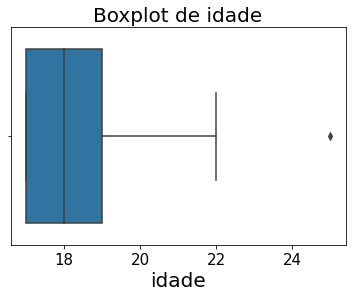

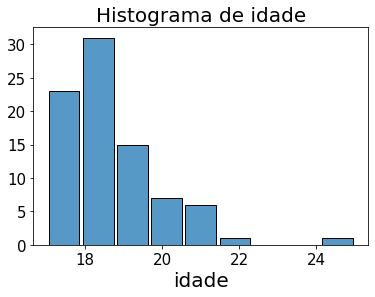

In [555]:
plt.figure(1)
plotaBox(df,'idade','Boxplot de idade','idade', '')

plt.figure(2)
plotaHist(df,'idade','Histograma de idade','idade', '')

<Axes: xlabel='renda'>

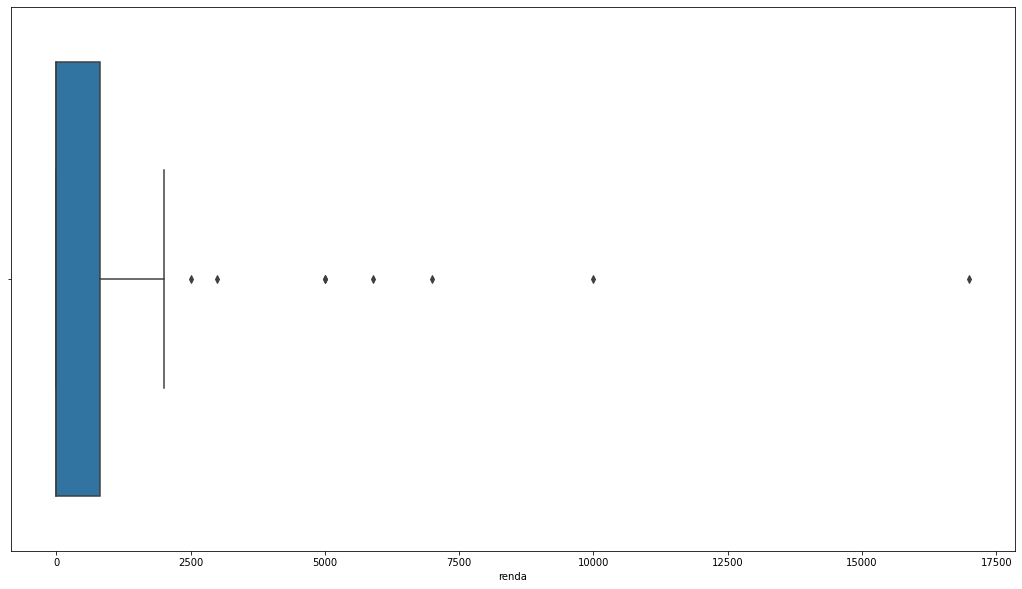

In [556]:
# analisando a renda
fig = plt.figure(figsize=(18, 10))
sns.boxplot(data=df, x='renda')

In [557]:
colunas_variaveis_discretas + colunas_variaveis_continuas

['idade', 'tempo_ideal', 'renda', 'valor_justo']

<Axes: title={'center': 'Histograma do valor justo'}, xlabel='valor_justo'>

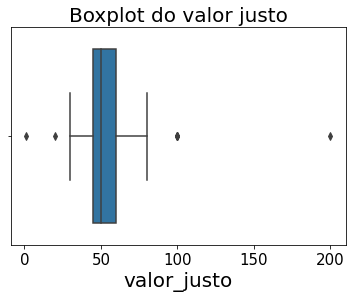

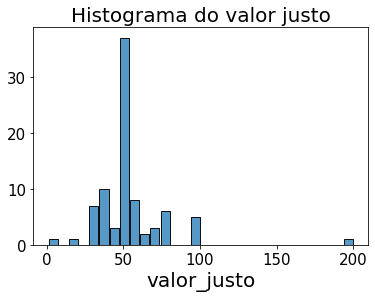

In [558]:
plt.figure(1)
plotaBox(data=df, x='valor_justo', titulo='Boxplot do valor justo', xlabel='valor_justo', ylabel='')

plt.figure(2)
plotaHist(data=df, x='valor_justo', titulo='Histograma do valor justo', xlabel='valor_justo', ylabel='')

<Axes: title={'center': 'Histograma do tempo ideal'}, xlabel='tempo_ideal'>

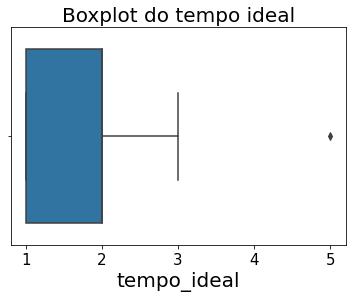

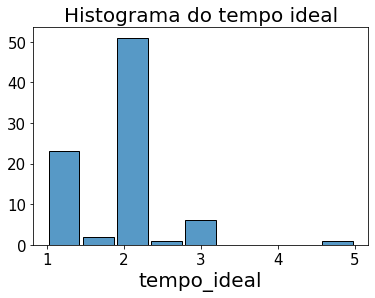

In [559]:
plt.figure(1)
plotaBox(data=df, x='tempo_ideal', titulo='Boxplot do tempo ideal', xlabel='tempo_ideal', ylabel='')

plt.figure(2)
plotaHist(data=df, x='tempo_ideal', titulo='Histograma do tempo ideal', xlabel='tempo_ideal', ylabel='')

In [560]:
variaveis_quantitativas = colunas_variaveis_discretas + colunas_variaveis_continuas

analise_quantitativa = df[variaveis_quantitativas].agg(['mean', 'median', 'std', 'var'])

analise_quantitativa = analise_quantitativa.round(2)

analise_quantitativa.loc['mode'] = df[variaveis_quantitativas].mode().iloc[0]

analise_quantitativa.loc['cv'] = df[variaveis_quantitativas].std()/df[variaveis_quantitativas].mean() * 100

analise_quantitativa.rename(index={'mean':'média', 'median':'mediana', 'std':'desvio padrão', 'var':'variância', 'mode': "moda", 'cv': '%'}, inplace=True)

analise_quantitativa


,idade,tempo_ideal,renda,valor_justo
média,18.420000,1.830000,9.230800e+02,54.630000
mediana,18.000000,2.000000,0.000000e+00,50.000000
desvio padrão,1.430000,0.660000,2.448790e+03,23.810000
variância,2.050000,0.430000,5.996556e+06,566.910000
moda,18.000000,2.000000,0.000000e+00,50.000000
%,7.780472,35.889303,2.652834e+02,43.583388


Limpando Outliers

In [561]:
# removendo outliers
for idx, line in df.iterrows():
    if line['renda'] >= 4000 and (line['profissao'] in ['Desempregado', "Estudante sem Renda"]):
        df.loc[idx, 'renda'] = 0

    if line['valor_justo'] < 10:
        df.loc[idx, 'valor_justo'] = df.valor_justo.mean()


<Axes: xlabel='renda'>

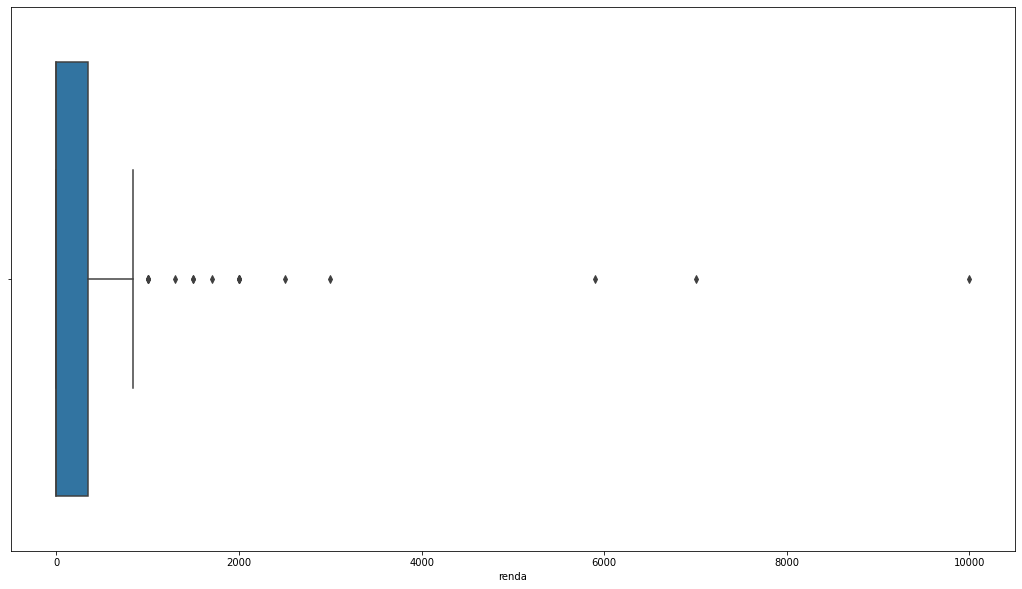

In [562]:
fig = plt.figure(figsize=(18, 10))
sns.boxplot(data=df, x='renda')

<Axes: title={'center': 'Boxplot do valor justo'}, xlabel='valor_justo'>

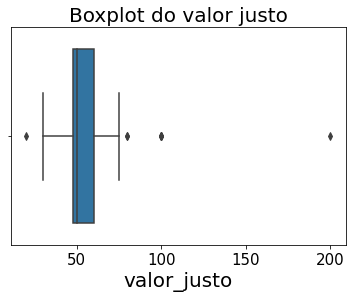

In [563]:
plotaBox(data=df, x='valor_justo', titulo='Boxplot do valor justo', xlabel='valor_justo', ylabel='')

Analisando perfil médio

,count,%
,,
Masculino,65,77.38
Feminino,19,22.62
total,84,100.00


,count,%
estado_civil,,
Casado(a),1,1.19
Solteiro(a),83,98.81
total,84,100.00


,count,%
regiao,,
Capital de SP,53,63.10
Interior de SP,4,4.76
Litoral de SP,1,1.19
Região do ABCD,26,30.95
total,84,100.00


,count,%
profissao,,
Desempregado,3,3.57
Estudante com Renda,16,19.05
Estudante sem Renda,64,76.19
Trabalhando,1,1.19
total,84,100.00


,count,%
,,
Muito fácil,4,4.76
Fácil,11,13.10
Médio,45,53.57
Difícil,14,16.67
Muito difícil,10,11.90
total,84,100.00


,count,%
serie,,
1º ano,71,84.52
2º ano,6,7.14
3º ano,2,2.38
4º ano,5,5.95
total,84,100.00


,count,%
interesse_tecnologia,,
False,24,28.57
True,60,71.43
total,84,100.00


<Axes: title={'center': 'Histograma de idade'}, xlabel='idade'>

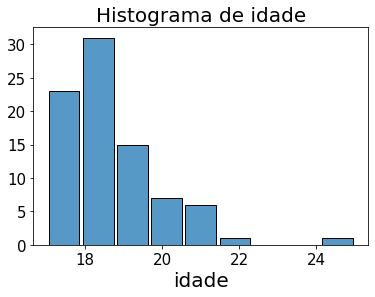

In [573]:
display(tableOfFrequency(df.sexo, tradutor=contrario_trocando_sexo))
display(tableOfFrequency(df.estado_civil))
display(tableOfFrequency(df.regiao))
display(tableOfFrequency(df.profissao))
display(tableOfFrequency(df.grau_de_dificuldade, {1:"Muito fácil", 2:"Fácil", 3:"Médio", 4:"Difícil", 5:"Muito difícil"}))
display(tableOfFrequency(df.serie))
display(tableOfFrequency(df.interesse_tecnologia))
plotaHist(data=df, x='idade', titulo='Histograma de idade', xlabel='idade', ylabel='')

Perfil médio:
Homem, da capital de São Paulo, solteiro de cerca de 18 anos, Estudante desempregado com interesse em tecnologia estudante da primeira série, com dificuldade média em cálculo. 

In [584]:
tempo_ideal_media = analise_quantitativa.loc['média', 'tempo_ideal']
valor_justo_media = analise_quantitativa.loc['média', 'valor_justo']

print(f"Tempo ideal médio: {tempo_ideal_media}")
print(f"Valor justo médio: {valor_justo_media}")
print(f"Preço médio: {valor_justo_media*tempo_ideal_media}")


Tempo ideal médio: 1.83
Valor justo médio: 54.63
Preço médio: 99.97290000000001


Em relação ao valor justo para a hora aula, será cerca de 54,6 reais, e o tempo ideal de aula será de 1 hora e 50 minutos (próximo do temo de aula de uma faculdade).
Portanto, o valor medio para uma media de aulas medias sera uma media de 100 reais.

maio relevancia
relevancia_aprovacao

relevancia_qualidade_dos_exercicios


relevancia_localizacao -> presencial

relevancia_nivel_de_profissionalizacao nem tanta gente se importa, mas quem importa se importa muito

o preço não é o mais importante, mas ainda é

por conclusão qualita do exercício é o fator mais importante 



95% gostava do produto, e compraria por 50 reais cerca de 70%

a maior parte acha um valor aceitável


dificuldades
dificuldades bem genérica, não existe um foco, então a aula teria que ter diveros pontos a serem analisados





Análise Bivariada Bruta

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


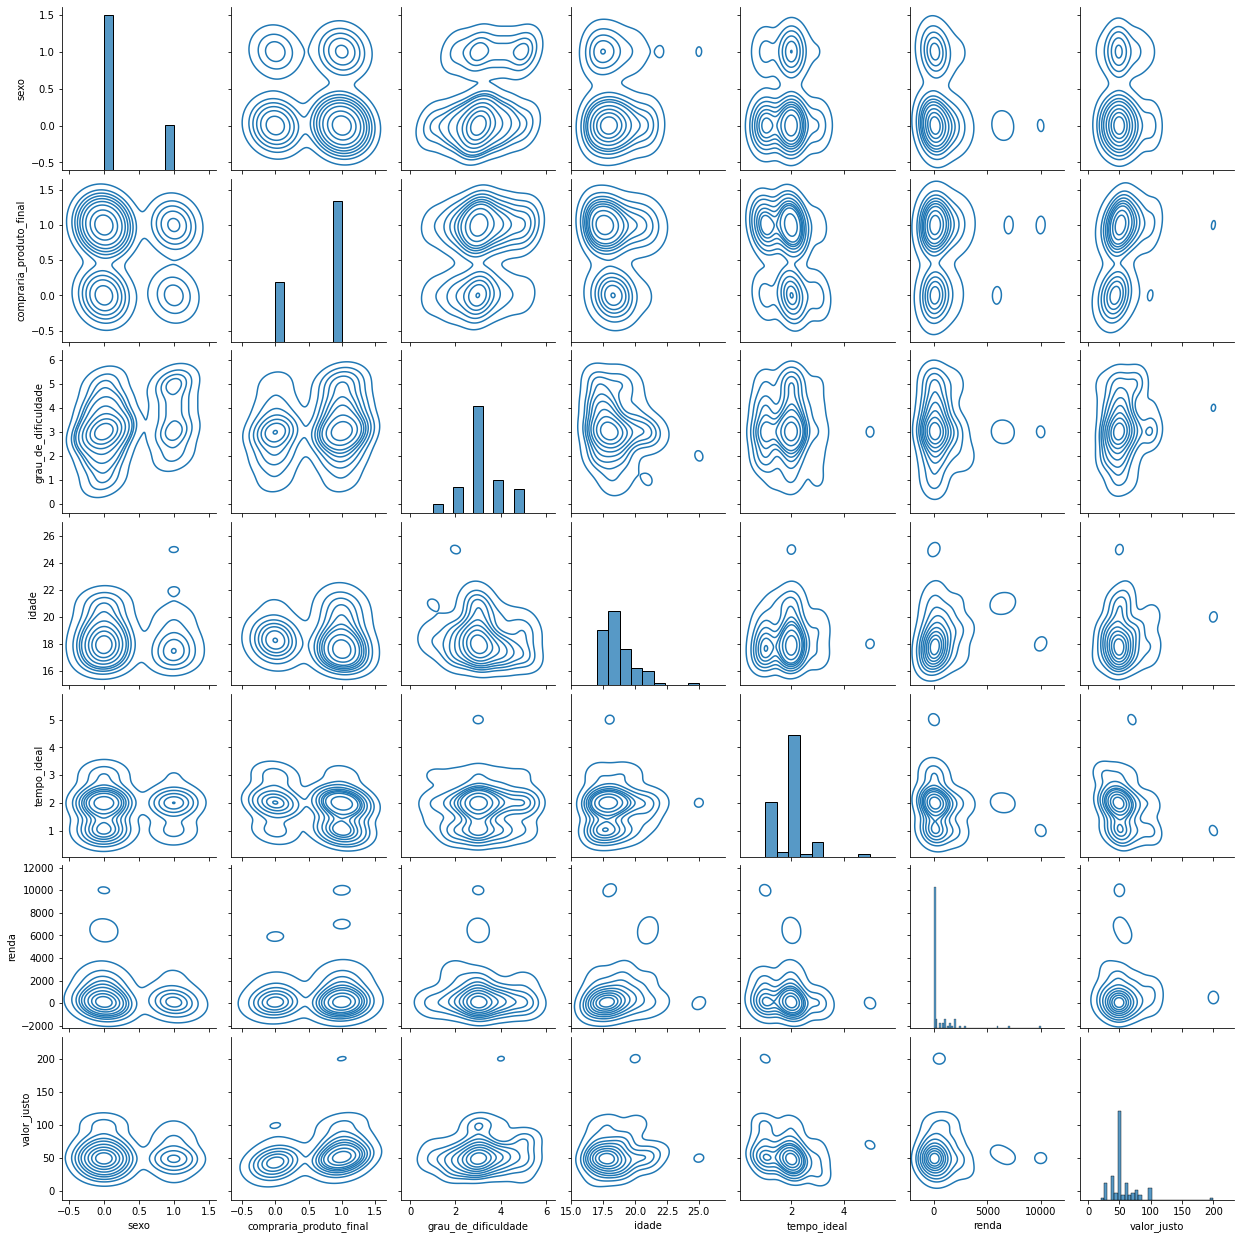

In [565]:

vars = ['sexo','compraria_produto_final','grau_de_dificuldade'] + variaveis_quantitativas
sns.pairplot(df,vars=vars,kind='kde',diag_kind='hist')